# Gamma Ray Absorption

In [1]:
# %load ../setup.py
"""
Packages for plotting and other stuff
version: 1.0
author: Riasat
"""
# %matplotlib widget

# data loading
import pandas as pd

# data maipulation
import pwlf
import numpy as np
from scipy.interpolate import interp1d

# plotting tools
import matplotlib.pyplot as plt

# extra tweaks
import warnings

warnings.filterwarnings("ignore")

# plot tweaks
plt.style.use("seaborn-poster")
pd.options.display.max_columns = None
pd.options.display.float_format = "{:.5f}".format

# function for extrapolation
def extrapolate1d(x, y):
    f = interp1d(x, y, kind="linear", fill_value="extrapolate")
    a = np.arange(0, x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate1d(x, y):
    f = interp1d(x, y, kind="linear", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate2d(x, y):
    f = interp1d(x, y, kind="quadratic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# function for interpolation
def interpolate3d(x, y):
    f = interp1d(x, y, kind="cubic", fill_value="extrapolate")
    a = np.arange(x[0], x[len(x) - 1], 0.001)
    b = f(a)
    return a, b


# funciton for polynomial fitting
def polfit(a, b, c):
    z = np.polyfit(a, b, c)
    f = np.poly1d(z)

    x = np.arange(a[0], a[len(a) - 1], 0.001)
    y = f(x)
    return x, y


# function for picewise linear fit
def picewise_linear_fit(x, y, segments):
    my_pwlf = pwlf.PiecewiseLinFit(x, y)  # fit my data
    res = my_pwlf.fit(segments)  # fit the data for n line segments
    # slopes = myPWLF.calc_slopes()  # calculate slopes

    # predict for the determined points
    xHat = np.linspace(min(x), max(x), num=10000)
    yHat = my_pwlf.predict(xHat)

    # calculate statistics
    # p = myPWLF.p_values(method="non-linear", step_size=1e-4)  # p-values
    # se = myPWLF.se  # standard errors
    return xHat, yHat


## Data


In [2]:
file_name = "data_absorption.xlsx"
# background count variable in units of counts per minute calculated at the operating voltage of 460V
bg_count = 50

# plateau datas
data_plateau = pd.read_excel(file_name, sheet_name="plateau")
pl_voltage = data_plateau["p_voltage"]
pl_counts = data_plateau["p_counts"]

# thickness data
data_thickness_al = pd.read_excel(file_name, sheet_name="aluminium")
data_thickness_pb = pd.read_excel(file_name, sheet_name="lead")
# tellurium datas
al_thickness_original = data_thickness_al["al_thickness"] / 2.7
al_counts_original = data_thickness_al["al_counts"] - bg_count
# strontium-ytterium datas
pb_thickness_original = data_thickness_pb["pb_thickness"] / 11.29
pb_counts_original = data_thickness_pb["pb_counts"] - bg_count

# print(f"aluminium thickness: {al_thickness_original},\n lead thickness: {pb_thickness_original}")
# print(f"aluminium counts: {al_counts_original}, \n lead counts: {pb_counts_original}")

## Operating Voltage


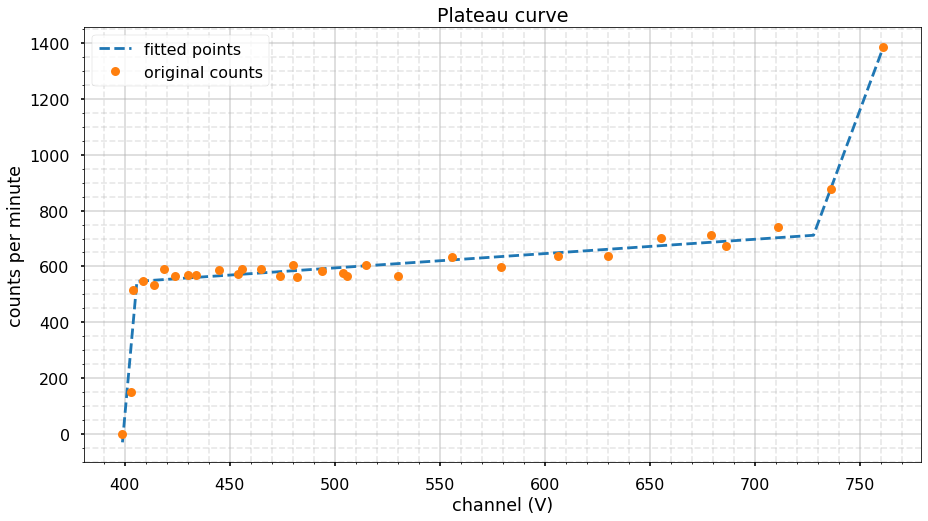

In [3]:
# fitted points
voltage_interpolated_pl, counts_interpolated_pl = picewise_linear_fit(pl_voltage, pl_counts,3)

plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))
plt.title(f"Plateau curve")
plt.xlabel("channel (V)")
plt.ylabel("counts per minute")
plt.plot(voltage_interpolated_pl, counts_interpolated_pl, "--", label="fitted points")
plt.plot(pl_voltage, pl_counts, "o", markersize=9, label="original counts")
plt.legend(loc="upper left")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")
plt.show()


I have chosen the operating voltage at 460 V


## Intensity Variation

Varying the absorber in the GM counter tube.


In [4]:
element_name = ["aluminium", "lead"]
order = 1

# original values in an array
thickness_original = [al_thickness_original, pb_thickness_original]
counts_original = [al_counts_original, pb_counts_original]

# logarithmic intenstiy values. needed for plotting
al_log_intensity = np.log(al_counts_original)
pb_log_intensity = np.log(pb_counts_original)

log_intensity = [al_log_intensity, pb_log_intensity]

# original thickness and counts fitted in a first order polynomial
thickness_fitted_al, al_log_intensity_fitted = polfit(al_thickness_original, al_log_intensity, order)
thickness_fitted_pb, pb_log_intensity_fitted = polfit(pb_thickness_original, pb_log_intensity, order)

# storing the values from above in an array
thickness_fitted = [thickness_fitted_al, thickness_fitted_pb]
log_intensity_fitted = [al_log_intensity_fitted, pb_log_intensity_fitted]
# counts_fitted = [counts_fitted_al, counts_fitted_pb]


# print(f"aluminium log: \n {al_log_intensity}, \n lead log: \n {pb_log_intensity}")

### Aluminium Absorber


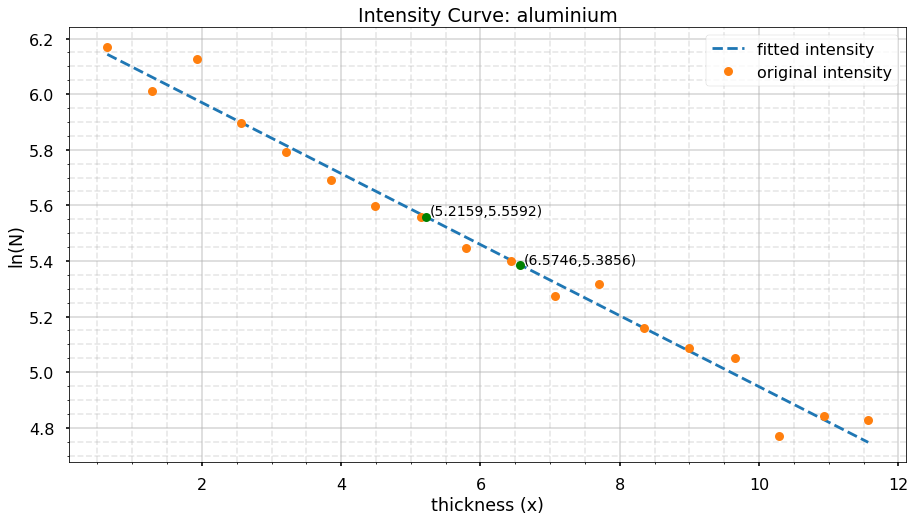

In [5]:
# plotting the curves
plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))

plt.title(f"Intensity Curve: {element_name[0]}")
plt.xlabel(r"thickness (x)")
plt.ylabel("ln(N)")

plt.plot(thickness_fitted[0], log_intensity_fitted[0], "--", label="fitted intensity")
plt.plot(thickness_original[0], log_intensity[0], "o", markersize=9, label="original intensity")

al_lnN = [5.5592, 5.3856]
al_x = [5.2159, 6.5746]
for i in range(2):
	plt.annotate(f"({al_x[i]},{al_lnN[i]})", xy=(0.05 + al_x[i], 0.005 + al_lnN[i]), fontsize=14)
	plt.plot(al_x[i], al_lnN[i], "go", markersize=9)


plt.legend(loc="upper right")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")

plt.show()


### Lead absorber


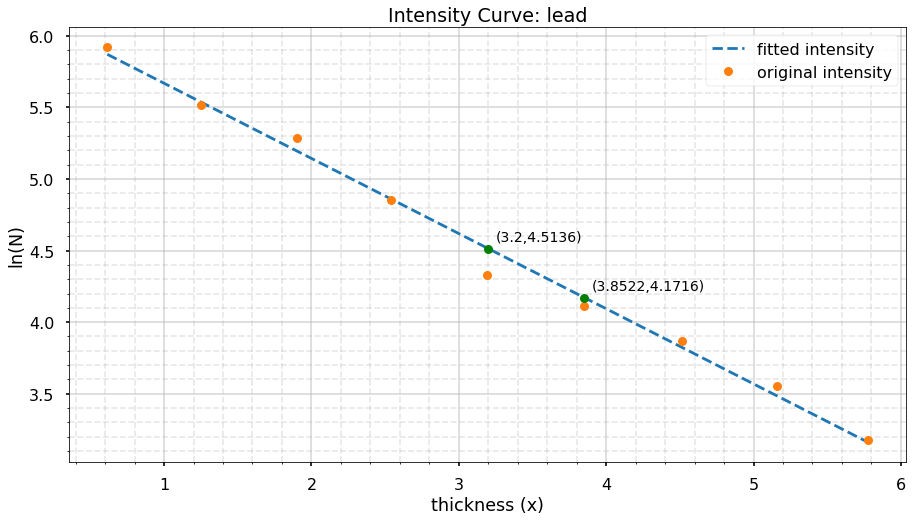

In [6]:
# plotting the curves
plt.style.use("seaborn-poster")
plt.figure(figsize=(15, 8))

plt.title(f"Intensity Curve: {element_name[1]}")
plt.xlabel(r"thickness (x)")
plt.ylabel("ln(N)")

plt.plot(thickness_fitted[1], log_intensity_fitted[1], "--", label="fitted intensity")
plt.plot(thickness_original[1], log_intensity[1], "o", markersize=9, label="original intensity")

pb_lnN = [4.5136, 4.1716]
pb_x = [3.2000, 3.8522]
for i in range(2):
	plt.annotate(f"({pb_x[i]},{pb_lnN[i]})", xy=(0.05 + pb_x[i], 0.05 + pb_lnN[i]), fontsize=14)
	plt.plot(pb_x[i], pb_lnN[i], "go", markersize=9)

plt.legend(loc="upper right")
plt.grid(alpha=0.5, which="major")
plt.minorticks_on()
plt.grid(alpha=0.3, which="minor", ls="--")

plt.show()


## Calculating the absorption coefficient


In [7]:
# al_del_lnN = 5.5793 - 5.5522
# al_del_x = 4.9379 - 5.1400
# pb_del_lnN = 4.9175 - 4.8345
# pb_del_x = 2.4003 - 2.5402
# density of aluminium and lead respectively in units of g/cm^3
density = [2.7, 11.29]

print(f"the absorption coefficient: \n")
for i in range(2):
    al_del_lnN = al_lnN[i] - al_lnN[i-1]
    al_del_x = al_x[i] - al_x[i-1]
    pb_del_lnN = pb_lnN[i] - pb_lnN[i-1]
    pb_del_x = pb_x[i] - pb_x[i-1]

    del_lnN = [al_del_lnN, pb_del_lnN]
    del_x = [al_del_x, pb_del_x]


# for i in range(2):
    abs_coeff = del_lnN[i] / del_x[i]
    final = abs(abs_coeff / density[i])
    print(f"{final:.5f} cm^2/g = {element_name[i]}")


the absorption coefficient: 

0.04732 cm^2/g = aluminium
0.04645 cm^2/g = lead
